No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


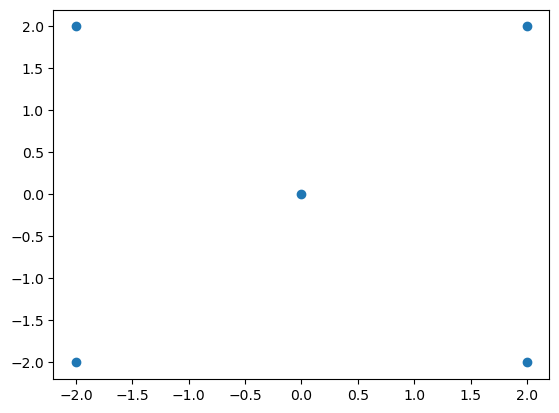

In [1]:
#1 having fixed points  we get the point moving toward them depending on 
# the strength of pulling to the given fixed point

# importing two required module 
import numpy as np
import matplotlib.pyplot as plt
import toolz
import optax
import jax.numpy as jnp
import jax


def get_contribution_in_axes(fixed_point,strength):
    # print(f"fixed_point {fixed_point} strength {strength}")
    e_x= jnp.array([1.0,0.0])
    e_y= jnp.array([0.0,1.0])
    x=optax.cosine_similarity(e_x,fixed_point)*strength
    y=optax.cosine_similarity(e_y,fixed_point)*strength
    return jnp.array([x,y])
v_get_contribution_in_axes=jax.vmap(get_contribution_in_axes)



points_const= jnp.array([[-2.0,-2.0],[-2.0,2.0],[2.0,2.0],[2.0,-2.0]])
# points_const= jnp.array([[2.0,2.0],[2.0,4.0],[4.0,4.0],[4.0,2.0]])
attraction_strength=jnp.array([1.0,1.0,1.0,1.0])

def get_4_point_loc(points_const,point_weights):
    calced=v_get_contribution_in_axes(points_const,point_weights)
    calced=jnp.sum(to_move,axis=0)
    return calced

to_move=v_get_contribution_in_axes(points_const,attraction_strength)


# to_move=list(map(lambda tuple: get_contribution_in_axes(tuple[0],tuple[1]), list(zip(points_const,attraction_strength ) )))
# to_move=jnp.stack(to_move)
calced=jnp.sum(to_move,axis=0)
calced= jnp.expand_dims(calced,axis=0)

points_const= jnp.concatenate([points_const,calced],axis=0)
X,Y=list(toolz.sandbox.core.unzip(points_const))
X=list(X)
Y=list(Y)
plt.scatter(X,Y)
plt.show()


# optax.cosine_distance(jnp.array([[2.0,2.0]]),jnp.array([[2.0,2.0]]))

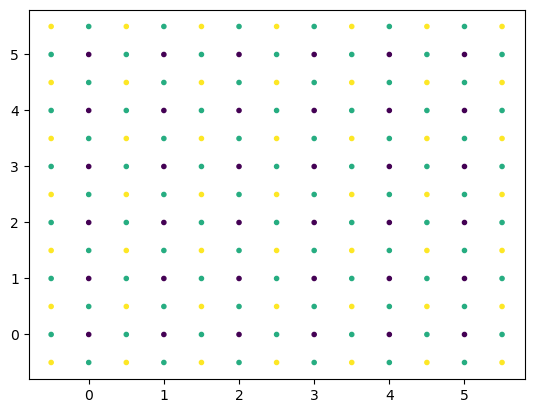

In [19]:
import einops
""" 
grid_b - green
grid_a - black
grid_c - yellow
now we need to 
1) given black are sv centers ; green will move only between centers; yellow will be moved using get_contribution_in_axes
    we will give some random floats as weights here and observe how it will look like
2) given some additional points that is not currently in the grid we will want to establish in which sv it is and mark this one in the display
"""
r=1
half_r=r/2
gridd=einops.rearrange(jnp.mgrid[0:6, 0:6],'c x y-> (x y) c')
gridd_bigger=einops.rearrange(jnp.mgrid[-1:7, -1:7],'c x y-> x y c')
# gridd=einops.rearrange(gridd,'(a e d) c-> d e a c', d=2,e=2)
grid_a_points=gridd
grid_b_points_x= (gridd_bigger+jnp.array([half_r,0.0]))[0:-1,1:-1,:]
grid_b_points_y= (gridd_bigger+jnp.array([0,half_r]))[1:-1,0:-1,:]

grid_c_points=(gridd_bigger+jnp.array([half_r,half_r]))[0:-1,0:-1,:]

grid_b_points_x=einops.rearrange(grid_b_points_x,'x y c-> (x y) c')
grid_b_points_y=einops.rearrange(grid_b_points_y,'x y c-> (x y) c')
grid_c_points=einops.rearrange(grid_c_points,'x y c-> (x y) c')


def disp_grid(grid_a_points,grid_b_points_x,grid_b_points_y,grid_c_points):
    grid_b_points= jnp.concatenate([grid_b_points_x,grid_b_points_y])
    x=jnp.concatenate([grid_a_points[:,0],grid_b_points[:,0],grid_c_points[:,0]])
    y=jnp.concatenate([grid_a_points[:,1],grid_b_points[:,1],grid_c_points[:,1]])
    c= jnp.concatenate([jnp.ones_like(grid_a_points[:,1])-0.9,np.ones_like(grid_b_points[:,1])+0.9,np.ones_like(grid_c_points[:,1])+2.0])
    plt.scatter(x,y,s=9.0,c=c)
    plt.show()


disp_grid(grid_a_points,grid_b_points_x,grid_b_points_y,grid_c_points)


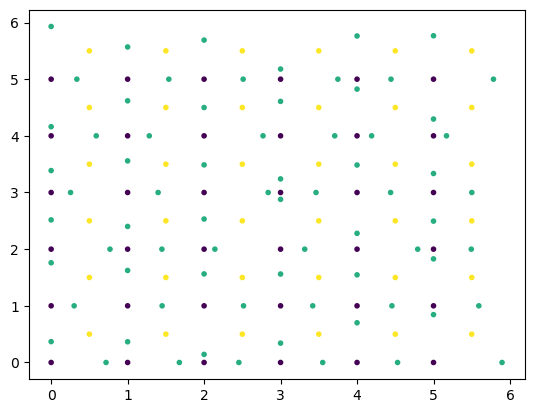

In [3]:
grid_b_points_x_weights= np.random.random(grid_b_points_x.shape)
grid_b_points_y_weights= np.random.random(grid_b_points_y.shape)
grid_c_points_weights= np.random.random(grid_c_points.shape[0],4)

def get_simple_4_point():
    


def move_in_axis(point,weights,axis,half_r ):
    """ 
    point can move up or down axis no more than half_r from current position 
    weights indicate how strongly it shoul go down (element 0) and up the axis  
    """
    return point.at[axis].set(point[axis]-weights[0]*half_r + weights[1]*half_r)
v_move_in_axis= jax.vmap(move_in_axis,in_axes=(0,0,None,None))

grid_b_points_x=v_move_in_axis(grid_b_points_x,grid_b_points_x_weights,0, half_r)
grid_b_points_y=v_move_in_axis(grid_b_points_y,grid_b_points_y_weights,1, half_r)



disp_grid(grid_a_points,grid_b_points_x,grid_b_points_y,grid_c_points)


In [4]:
import optax
import jax.numpy as jnp
optax.cosine_distance(jnp.array([[2.0,2.0]]),jnp.array([[2.0,2.0]]))

Array([5.9604645e-08], dtype=float32)

In [5]:
optax.cosine_similarity(jnp.array([[2.0,2.0]]),jnp.array([[-2.0,-2.0]]))

Array([-0.99999994], dtype=float32)